In [3]:
%matplotlib inline
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import numpy as np
import re
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

### Rate My Professor Analysis

In [3]:
df = pd.read_csv("modifiedProfInfo.csv")
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 43066 observations and 30 features in this dataset. 



### Let's Generate a WordCloud of All the Comments

In [4]:
text = " ".join(comment for comment in df.rComments if pd.notnull(comment))

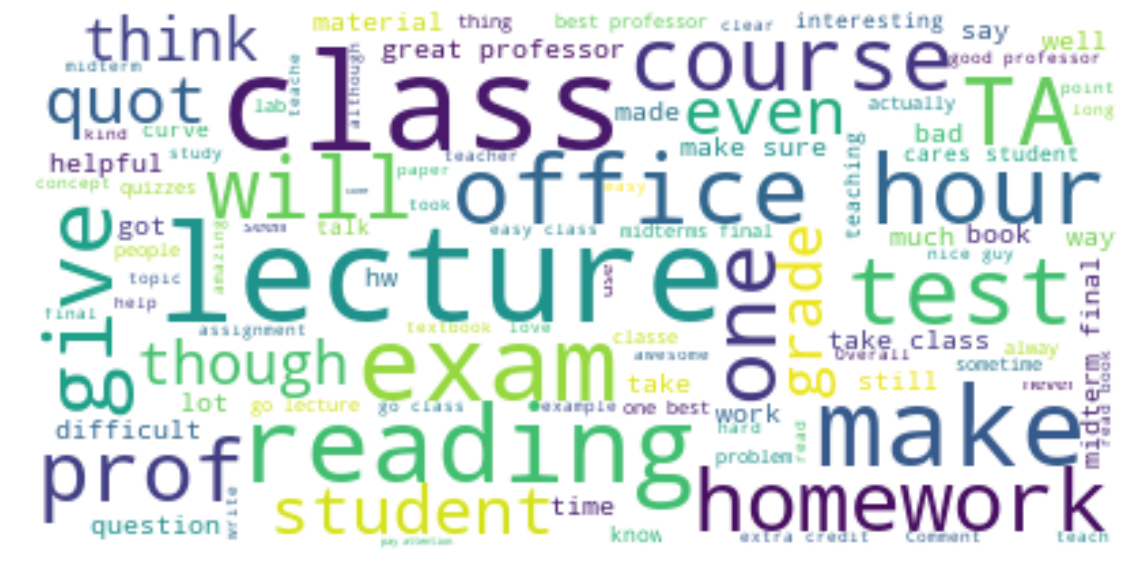

In [25]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### And One More for School Pride :)

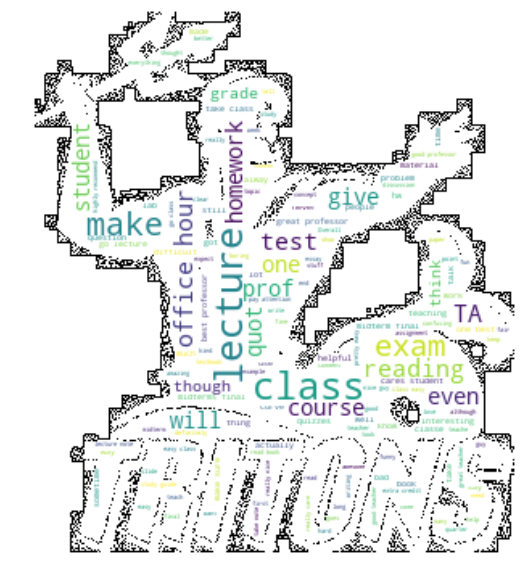

In [259]:
tritons = np.array(Image.open('tritons.jpg'))
wc = WordCloud(background_color="white", max_words=1000, mask=tritons,
               stopwords=stopwords, contour_width=0.1)
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [237]:
nn_grades = df['teacherGrade'].value_counts().sum()
n_grades = len(df['teacherGrade'])
reported = nn_grades/n_grades
print("There are {} reported grades out of {} all reviews resulting in {}% total grades reported . \n".format(nn_grades,n_grades,reported))     

There are 8112 reported grades out of 43066 all reviews resulting in 0.18836204894812614% total grades reported . 



In [247]:
len(df['tLname'].unique())

2367

### Cape Analysis

In [327]:
df_capes = pd.read_csv("capeReviewsCleaned2.csv")
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
df_capes.head()

There are 43066 observations and 30 features in this dataset. 



,Unnamed: 0,Instructor,tLname,tFname,tDept,Course,Term,Enroll,Evals Made,Eval / Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,tid
0,0,"Goldstein, Paul S",Goldstein,Paul,ANTH,ANTH 101 - Foundations/Social Complexity (A),183,137,73,0.532847,0.812,0.791,4.00,3.33,NaN,222495
1,1,"Semendeferi, Ekaterini",Semendeferi,Ekaterini,ANTH,ANTH 196A - Honors Studies in Anthropology (A),183,13,4,0.307692,1.000,1.000,7.00,4.00,NaN,1171683
2,2,"Rothschild, Amy C",Rothschild,Amy,ANTH,ANTH 21 - Race and Racisms (A),183,212,96,0.452830,0.947,0.978,3.01,3.58,NaN,-1
3,3,"Kang, Byung Chu",Kang,Byung,ANTH,ANTH 21 - Race and Racisms (B),183,314,214,0.681529,0.942,0.937,3.36,3.82,NaN,2308255
4,4,"Stewart, Alexander B",Stewart,Alexander,ANTH,ANTH 23 - Debating Multiculturalism (A),183,407,351,0.862408,0.879,0.956,3.53,3.58,NaN,2099749


In [62]:
def topNCapes(column, n):
    eval_dict = {}
    depts = df_capes['tDept'].unique()
    for d in depts:
        eval_dict[d] = df_capes[df_capes["tDept"] == d][column].values.sum()

    #grab the top ten evaluations
    sorted_by_value = sorted(eval_dict.items(), key=lambda kv: kv[1], reverse=True)[:n]
    courses = [course[0] for course in sorted_by_value]
    values = [course[1] for course in sorted_by_value]
    
    return pd.Series(values,index=courses, name='top ' + str(n) + " " + column)  

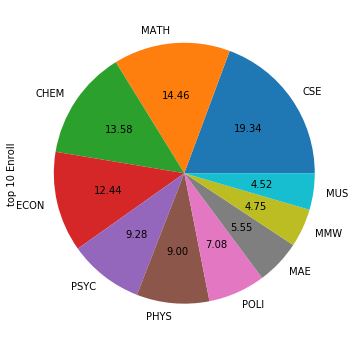

In [63]:
cape_enrolls = topNCapes('Enroll', 10)
cape_enrolls.plot.pie(figsize=(6, 6),autopct='%.2f')

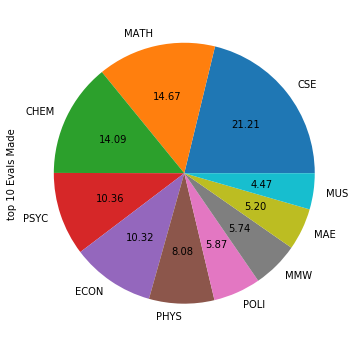

In [64]:
cape_evals = topNCapes('Evals Made', 10)
cape_evals.plot.pie(figsize=(6, 6),autopct='%.2f')

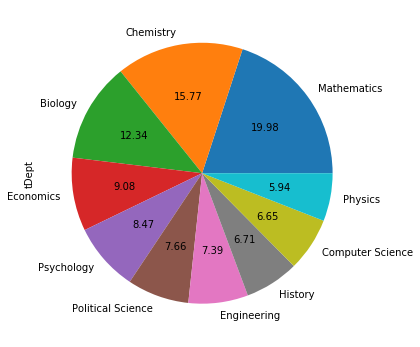

In [65]:
eval_series_rmp = df['tDept'].value_counts()[:10]
#eval_series_rmp.name = "top 10 eval numbers RMP"
eval_series_rmp.plot.pie(figsize=(6,6),autopct='%.2f')

In [274]:
df_capes[df_capes['Avg Grade Received'] == 4.0]

,Unnamed: 0,Instructor,tLname,tFname,tDept,Course,Term,Enroll,Evals Made,Eval / Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,tid
264,264,"Wheeler, Bruce Christopher",Wheeler,Bruce,BENG,BENG 119B - Design Implmntatn Biomechanics (A),180,24,5,0.208333,0.600,1.000,3.70,4.00,4.0,2448656
268,268,"Wheeler, Bruce Christopher",Wheeler,Bruce,BENG,BENG 128B - Design Implmnt Genetic Circuit (A),180,21,9,0.428571,0.889,1.000,9.75,3.89,4.0,2448656
277,277,"Wheeler, Bruce Christopher",Wheeler,Bruce,BENG,BENG 169B - Design Implmntatn Tissue Engin (A),180,27,5,0.185185,1.000,1.000,7.70,4.00,4.0,2448656
403,403,"Cabrales, Pedro",Cabrales,Pedro,BENG,BENG 187D - BENG Design Proj:Presentation (A),161,114,29,0.254386,0.929,0.964,7.62,3.79,4.0,-1
654,654,"Watson, John Thomas",Watson,John,BENG,BENG 187A - BENG Design Project: Planning (A),121,130,34,0.261538,0.941,0.882,0.91,3.96,4.0,-1
994,994,"Stalbaum, Brett",Stalbaum,Brett,CAT,CAT 124 - Sixth College Practicum (A),171,23,9,0.391304,0.857,1.000,4.50,3.57,4.0,757552
1815,1815,"Debelouchina, Galia T",Debelouchina,Galia,CHEM,CHEM 113 - Biophysical Chem of Macromolec (B),181,21,9,0.428571,0.889,1.000,6.50,3.89,4.0,2364738
1816,1816,"Komives, Elizabeth A",Komives,Elizabeth,CHEM,CHEM 113 - Biophysical Chem of Macromolec (B),181,21,9,0.428571,0.889,1.000,6.50,3.89,4.0,343826
2487,2487,"Whitesell, James K.",Whitesell,James,CHEM,CHEM 151 - Molecules That Changed World (A),140,69,24,0.347826,0.958,0.917,2.85,3.96,4.0,497374
4452,4452,"Boyle, Mary E. T.",Boyle,Mary,COGS,COGS 11 - Minds & Brains (A),162,23,7,0.304348,0.857,0.857,5.64,3.40,4.0,156170


### Working on Combined Datasets

In [4]:
df2 = pd.read_csv("FullData.csv", header=0)

In [338]:
df2[df2['tid'] == 63531]

,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll
17,63531,1.0,CSE,25178,13460,0.534594,0.852887,0.799226,7.715064,3.519904,3.139993,3.847059,3.223529,3.87037,3.155882,0.511111,3.536957,0.076316,"Lecture heavy,Accessible outside class,Respect...",0.006752


In [279]:
pv = pd.pivot_table(df2, values='Eval/Enroll', index=['gender','Avg Grade Received'])

In [289]:
avgee_men = df2[df2['gender'] == 1]['Eval/Enroll'].mean()
avgee_women = df2[df2['gender'] == -1]['Eval/Enroll'].mean()

In [293]:
avgg_men = df2[df2['gender'] == 1]['Avg Grade Received'].mean()
avgg_women = df2[df2['gender'] == -1]['Avg Grade Received'].mean()

In [552]:
pv = pd.pivot_table(df2, values='Eval/Enroll', index=['gender','Avg Grade Received'])
pv

Eval/Enroll
gender Avg Grade Received             
-1.0   2.030000               0.766129
       2.365093               0.440816
       2.390000               0.541667
       2.408400               0.353774
       2.422292               0.625635
       2.454076               0.553637
       2.508113               0.424000
       2.516067               0.542811
       2.550000               0.514286
       2.557451               0.681901
       2.569651               0.397976
       2.574881               0.432317
       2.580548               0.695238
       2.591853               0.458047
       2.602157               0.424695
       2.612075               0.815534
       2.630000               0.460784
       2.631968               0.449541
       2.633913               0.587189
       2.660000               0.371429
       2.664715               0.467831
       2.667368               0.469136
       2.670000               0.880597
       2.687132               0.737828
       2.699256               0.605590
       2.701128               0.660668
       2.710000               0.731707
       2.716949               0.360790
       2.720000               0.711111
       2.723216               0.590889
...                                ...
 1.0   3.658947               0.434211
       3.670086               0.435045
       3.672150               0.433846
       3.678314               0.416038
       3.682706               0.652893
       3.695000               0.620690
       3.704116               0.459834
       3.705685               0.488215
       3.710000               0.614035
       3.738395               0.483871
       3.747687               0.459375
       3.748077               0.576419
       3.750000               0.292929
       3.760000               0.947368
       3.760289               0.550072
       3.773864               0.467283
       3.780000               0.360000
       3.784190               0.546323
       3.790000               0.375000
       3.846477               0.458333
       3.846538               0.408046
       3.850000               0.642857
       3.880000               0.689655
       3.890000               0.267717
       3.894332               0.281072
       3.898182               0.466877
       3.935604               0.482625
       3.940000               0.185185
       3.970957               0.617978
       3.994947               0.534161

[1206 rows x 1 columns]

In [333]:
df_capes[df_capes['tLname'] == 'Gillespie']

,Unnamed: 0,Instructor,tLname,tFname,tDept,Course,Term,Enroll,Evals Made,Eval / Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,tid
6134,6134,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 110 - Software Engineering (A),183,247,83,0.336032,0.650,0.577,10.01,3.53,NaN,63531
6153,6153,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (A),183,168,79,0.470238,0.704,0.614,5.23,3.26,NaN,63531
6154,6154,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (B),183,146,95,0.650685,0.724,0.640,5.24,3.29,NaN,63531
6155,6155,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (C),183,87,44,0.505747,0.659,0.538,4.50,3.24,NaN,63531
6205,6205,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 110 - Software Engineering (A),181,241,148,0.614108,0.724,0.632,8.90,3.54,3.31,63531
6207,6207,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 12 - Basic Data Struct & OO Design (A),181,170,77,0.452941,0.845,0.803,12.72,3.28,3.01,63531
6229,6229,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (C),181,117,51,0.435897,0.816,0.723,4.46,3.36,3.03,63531
6268,6268,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 12 - Basic Data Struct & OO Design (A),180,135,101,0.748148,0.867,0.847,11.79,3.55,3.05,63531
6284,6284,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (A),180,157,127,0.808917,0.738,0.669,4.11,3.55,3.27,63531
6285,6285,"Gillespie, Gary N",Gillespie,Gary,CSE,CSE 15L - Software Tools&Techniques Lab (B),180,152,127,0.835526,0.714,0.597,3.78,3.45,3.27,63531


In [320]:
dept_avg = {}
depts = df2['tDept'].unique()
for d in depts:
    dept_avg[d] = df2[df2['tDept'] == d]['Avg Grade Received'].mean()

In [330]:
series = pd.Series(dept_avg).sort_values()

In [331]:
#df2.corr().unstack().sort_values(ascending=False).drop_duplicates()[:30]

In [339]:
df2.corr()

,tid,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll
tid,1.000000,-0.128044,-0.233085,-0.210313,0.115497,0.046099,-0.001909,0.132634,-0.039373,0.072296,0.044922,0.117925,0.010856,0.103941,0.062024,0.057358,0.098476,-0.113295
gender,-0.128044,1.000000,0.076551,0.056402,-0.170901,-0.064318,-0.034920,0.163336,-0.182918,-0.205298,0.084646,-0.011822,-0.020919,-0.017517,0.030362,0.017334,0.013582,-0.047600
Enroll,-0.233085,0.076551,1.000000,0.962361,-0.123082,0.030946,0.075839,0.055707,-0.017448,-0.042050,-0.001720,0.036227,0.017315,0.046158,0.012029,-0.014710,0.051282,-0.097322
Evals Made,-0.210313,0.056402,0.962361,1.000000,-0.008690,0.042130,0.097572,0.072085,-0.026153,-0.035027,0.005367,0.056516,0.028833,0.066273,0.020620,-0.022318,0.062323,-0.098366
Eval/Enroll,0.115497,-0.170901,-0.123082,-0.008690,1.000000,0.090644,0.148152,-0.082717,0.013844,0.098760,-0.030084,0.105804,0.040461,0.113732,0.015672,-0.046596,0.055087,0.068208
Rcmnd Class,0.046099,-0.064318,0.030946,0.042130,0.090644,1.000000,0.704382,-0.175021,0.481200,0.219124,-0.277107,0.435628,0.357271,0.447875,0.303935,0.120871,0.334031,0.048307
Rcmnd Instr,-0.001909,-0.034920,0.075839,0.097572,0.148152,0.704382,1.000000,-0.166881,0.388413,0.264166,-0.274155,0.575560,0.338115,0.607847,0.374810,0.179245,0.434771,0.036704
Study Hrs/wk,0.132634,0.163336,0.055707,0.072085,-0.082717,-0.175021,-0.166881,1.000000,-0.481949,-0.331798,0.380900,-0.073987,-0.016655,-0.087637,-0.091688,-0.066102,-0.063407,-0.041253
Avg Grade Expected,-0.039373,-0.182918,-0.017448,-0.026153,0.013844,0.481200,0.388413,-0.481949,1.000000,0.758011,-0.465803,0.200311,0.217549,0.214171,0.131856,0.250663,0.183177,0.075379
Avg Grade Received,0.072296,-0.205298,-0.042050,-0.035027,0.098760,0.219124,0.264166,-0.331798,0.758011,1.000000,-0.381679,0.184626,0.226747,0.189124,0.067661,0.323149,0.180095,0.037208


In [457]:
capes_grades = df2['Avg Grade Received'].dropna().values

In [46]:
def plotNormal(data):
    xs = np.arange(data.min(), data.max(), 0.1)
    fit = stats.norm.pdf(xs, np.mean(data), np.std(data))
    plt.plot(xs, fit, label='Normal Dist.', lw=4)
    plt.hist(data, density=True, label='Actual Data');
    plt.title('Average Grades per Professor')
    plt.legend();

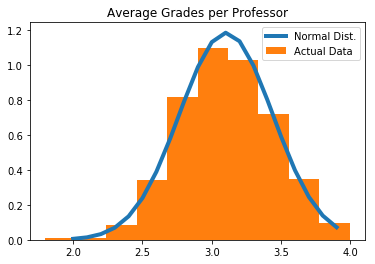

In [458]:
xs = np.arange(2.0, 4.0, 0.1)
fit = stats.norm.pdf(xs, np.mean(capes_grades), np.std(capes_grades))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(capes_grades, density=True, label='Actual Data');
plt.title('Average Grades per Professor')
plt.legend();

In [462]:
capes_grades = df2['Avg Grade Received'].values
total_evals = df2['Enroll'].sum()
evals = df2['Enroll'] / total_evals
weighted_capes_grades = capes_grades * evals
weighted_capes_grades = weighted_capes_grades.dropna().values

1409

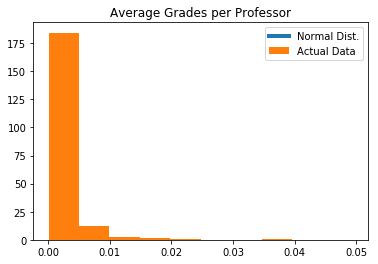

In [460]:
plotNormal(weighted_capes_grades)

In [461]:
normaltest(weighted_capes_grades)

NormaltestResult(statistic=1684.9962901139263, pvalue=0.0)

In [426]:
normaltest(rgg)

NormaltestResult(statistic=0.6140201126327857, pvalue=0.7356432030092538)

In [389]:
rmp_grades =  df2['rmp Grade']

1531

In [409]:
rmp_grades =  df2['rmp Grade'].dropna()

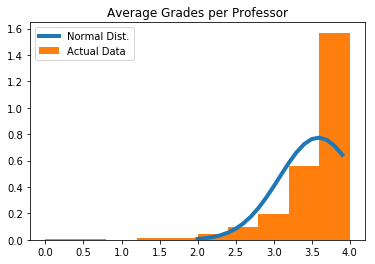

In [410]:
xs = np.arange(2.0, 4.0, 0.1)
fit = stats.norm.pdf(xs, np.mean(rmp_grades), np.std(rmp_grades))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(rmp_grades, density=True, label='Actual Data');
plt.title('Average Grades per Professor')
plt.legend();

In [464]:
ee = df2['rmp Evals/Enroll'].values

ValueError: x and y must be the same size

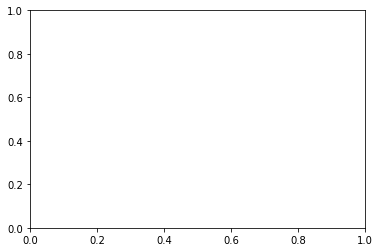

In [465]:
plt.scatter(df2['rmp Grade'].dropna(),ee)

In [479]:
rmp_grades = df2[pd.isnull(df2['rmp Grade'])]
rmp_grades['sentimentValue'].mean()

0.14169871818266414

In [491]:
plotNormal(rmp_grades['Avg Grade Received'].values)

/Users/chadlohrli/anaconda/envs/cogs108/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/chadlohrli/anaconda/envs/cogs108/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: arange: cannot compute length

In [487]:
rmp_grades_nan['rOverall'].mean()

3.557555678486813

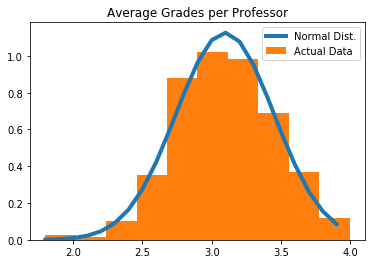

In [497]:
rmp_nan_grades = df2[pd.isnull(df2['rmp Grade'])]
plotNormal(rmp_nan_grades['Avg Grade Received'].dropna().values)
p_value = normaltest(rmp_nan_grades['Avg Grade Received'].dropna().values)

In [496]:
normaltest(rmp_grades['Avg Grade Received'].dropna().values)

NormaltestResult(statistic=0.3571100561964176, pvalue=0.8364780258159491)

In [503]:
avg_ee = df2['rmp Evals/Enroll'].mean()

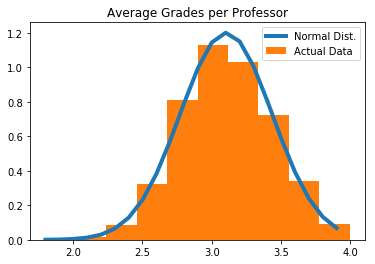

In [513]:
avg_ee = df2['rmp Evals/Enroll'].mean()
grades = df2[df2['rmp Evals/Enroll'] < avg_ee]['Avg Grade Received'].dropna()
plotNormal(grades)

In [516]:
df2[df2['tDept'] == 'CSE'].corr()

,tid,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll
tid,1.000000,-0.171264,-0.294444,-0.189483,0.310449,0.201108,0.150657,0.370162,0.025626,0.278822,0.016662,0.252635,0.155844,0.246868,0.321916,0.022822,0.149170,-0.030965
gender,-0.171264,1.000000,-0.091297,-0.179373,-0.354647,-0.038310,-0.102952,0.124091,0.038832,0.258286,-0.006456,-0.035864,0.052310,-0.035601,-0.178497,0.040242,-0.055437,-0.040806
Enroll,-0.294444,-0.091297,1.000000,0.958640,-0.059722,0.153707,0.119219,-0.070469,0.243151,0.095222,-0.089984,0.044259,0.178458,0.038927,-0.067886,0.094142,0.080236,-0.234250
Evals Made,-0.189483,-0.179373,0.958640,1.000000,0.132252,0.209736,0.173434,-0.010764,0.254152,0.067149,-0.081737,0.107226,0.216719,0.099315,0.008495,0.068966,0.115784,-0.210250
Eval/Enroll,0.310449,-0.354647,-0.059722,0.132252,1.000000,0.068039,0.153819,0.056827,-0.013864,-0.209378,0.158131,0.189371,0.043946,0.176989,0.274726,-0.046864,0.086092,0.105223
Rcmnd Class,0.201108,-0.038310,0.153707,0.209736,0.068039,1.000000,0.661684,-0.025618,0.517879,0.384941,-0.419857,0.487235,0.496498,0.493298,0.351845,0.371231,0.504237,0.000033
Rcmnd Instr,0.150657,-0.102952,0.119219,0.173434,0.153819,0.661684,1.000000,0.069770,0.263242,0.214820,-0.342087,0.758881,0.585540,0.776816,0.444343,0.305012,0.683809,0.012349
Study Hrs/wk,0.370162,0.124091,-0.070469,-0.010764,0.056827,-0.025618,0.069770,1.000000,-0.324048,-0.172157,0.045956,0.254659,0.238304,0.255238,0.041860,0.178354,0.061408,0.192261
Avg Grade Expected,0.025626,0.038832,0.243151,0.254152,-0.013864,0.517879,0.263242,-0.324048,1.000000,0.720186,-0.531857,0.183225,0.092809,0.167089,0.217435,0.260632,0.210934,-0.146686
Avg Grade Received,0.278822,0.258286,0.095222,0.067149,-0.209378,0.384941,0.214820,-0.172157,0.720186,1.000000,-0.526252,0.239336,0.122517,0.223365,0.090537,0.318777,0.330615,-0.278453


In [522]:
df2['rOverall'].values

array([2.47435897, 4.0183727 , 4.5755814 , ..., 5.        , 1.        ,
       5.        ])

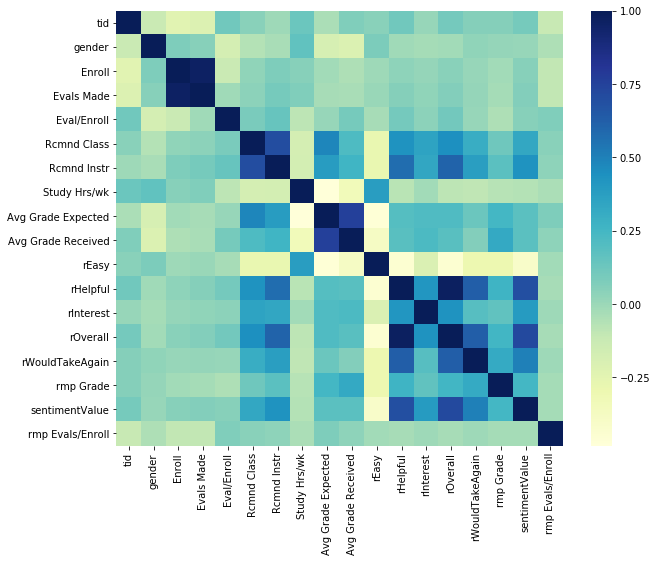

In [534]:
corr = df2.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="YlGnBu")

In [536]:
df2.corr().unstack().sort_values(ascending=False).drop_duplicates()[30:50]

rOverall            rmp Grade             0.257361
rmp Grade           Avg Grade Expected    0.250663
sentimentValue      rmp Grade             0.249493
rInterest           Avg Grade Received    0.226747
Rcmnd Class         Avg Grade Received    0.219124
rInterest           Avg Grade Expected    0.217549
rOverall            Avg Grade Expected    0.214171
rHelpful            Avg Grade Expected    0.200311
rInterest           rWouldTakeAgain       0.191411
rOverall            Avg Grade Received    0.189124
Avg Grade Received  rHelpful              0.184626
sentimentValue      Avg Grade Expected    0.183177
                    Avg Grade Received    0.180095
Rcmnd Instr         rmp Grade             0.179245
rInterest           rmp Grade             0.164395
gender              Study Hrs/wk          0.163336
Eval/Enroll         Rcmnd Instr           0.148152
tid                 Study Hrs/wk          0.132634
Avg Grade Expected  rWouldTakeAgain       0.131856
Rcmnd Class         rmp Grade  

In [541]:
df2
df2.corr()['gender'].sort_values(ascending=False)[1:10]

Study Hrs/wk       0.163336
rEasy              0.084646
Enroll             0.076551
Evals Made         0.056402
rWouldTakeAgain    0.030362
rmp Grade          0.017334
sentimentValue     0.013582
rHelpful          -0.011822
rOverall          -0.017517
Name: gender, dtype: float64

In [545]:
depts = df2['tDept'].unique()
df2[df2['tDept'] == 'CSE']

,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll
17,63531,1.0,CSE,25178,13460,0.534594,0.852887,0.799226,7.715064,3.519904,3.139993,3.847059,3.223529,3.870370,3.155882,0.511111,3.536957,0.076316,"Lecture heavy,Accessible outside class,Respect...",0.006752
25,87151,1.0,CSE,3294,1360,0.412872,0.779896,0.614766,7.636485,3.400047,3.042371,3.375000,3.000000,2.785714,2.750000,0.500000,4.000000,0.122587,"Respected,Amazing lectures,",0.004857
51,122308,1.0,CSE,10362,4436,0.428103,0.882720,0.787776,7.555879,3.430446,3.144815,3.012821,2.910256,3.641509,3.000000,NaN,NaN,0.019705,"Respected,",0.007528
64,138434,1.0,CSE,1388,772,0.556196,0.703311,0.753847,3.211244,3.558057,3.055399,3.789474,2.631579,3.333333,2.947368,NaN,2.300000,-0.040191,NaN,0.013689
93,164247,1.0,CSE,6762,2800,0.414079,0.822275,0.901647,6.735671,3.629643,3.436413,2.250000,4.062500,3.636364,4.187500,0.750000,4.000000,0.179806,"Clear grading criteria,Get ready to read,Lectu...",0.002366
195,332385,1.0,CSE,1462,898,0.614227,0.757882,0.668895,6.336013,3.352638,3.317457,4.000000,2.333333,3.000000,2.083333,NaN,NaN,0.165413,NaN,0.004104
226,362281,1.0,CSE,2478,1066,0.430186,0.936413,0.930597,6.385910,3.312570,3.033063,3.000000,3.625000,4.000000,3.562500,0.666667,4.000000,0.252282,"Amazing lectures,Respected,""Skip class? You wo...",0.003228
240,371301,1.0,CSE,1824,812,0.445175,0.846431,0.479441,7.325911,3.158227,2.668670,2.857143,2.333333,2.894737,2.333333,NaN,3.850000,-0.000023,NaN,0.011513
289,440394,1.0,CSE,3075,1883,0.612358,0.799239,0.827962,8.181179,3.134015,2.751630,4.103448,3.241379,3.000000,3.327586,0.769231,3.066667,0.075431,"Lots of homework,Test heavy,Lecture heavy,Toug...",0.009431
292,449659,-1.0,CSE,3738,1616,0.432317,0.712687,0.629484,7.383255,3.000514,2.574881,4.410256,2.871795,3.030303,2.769231,0.666667,3.460000,0.051893,"Lecture heavy,Tough grader,Lots of homework,Ge...",0.010433


In [550]:
for d in depts:
    corr = df2[df2['tDept'] == d].corr()
    print(d)
    display(corr['gender'].sort_values(ascending=False)[1:30])

PHYS


rEasy                 0.164205
Evals Made            0.155374
Enroll                0.150601
Avg Grade Expected    0.111396
rmp Grade             0.062360
sentimentValue        0.053730
rInterest             0.025689
rmp Evals/Enroll      0.019746
Avg Grade Received    0.003130
Rcmnd Instr          -0.005201
rWouldTakeAgain      -0.015733
rHelpful             -0.028585
Rcmnd Class          -0.057285
rOverall             -0.098887
Study Hrs/wk         -0.203396
Eval/Enroll          -0.214208
tid                  -0.251046
Name: gender, dtype: float64

CHEM


rmp Evals/Enroll      0.078067
Avg Grade Expected    0.068528
Eval/Enroll           0.010474
rInterest            -0.014304
Evals Made           -0.015417
Rcmnd Instr          -0.029835
Rcmnd Class          -0.037238
Enroll               -0.042669
rmp Grade            -0.061893
rHelpful             -0.074471
sentimentValue       -0.095740
rEasy                -0.099820
rOverall             -0.105010
Study Hrs/wk         -0.109803
Avg Grade Received   -0.137510
rWouldTakeAgain      -0.205409
tid                  -0.227764
Name: gender, dtype: float64

MMW


rWouldTakeAgain       0.953550
rOverall              0.882742
sentimentValue        0.838498
rHelpful              0.816619
Rcmnd Instr           0.787374
Rcmnd Class           0.633031
rmp Grade             0.538376
Avg Grade Expected    0.518714
rInterest             0.398027
Evals Made            0.318498
Enroll                0.304081
Eval/Enroll          -0.044698
Avg Grade Received   -0.094318
rEasy                -0.107314
Study Hrs/wk         -0.224212
tid                  -0.283900
rmp Evals/Enroll     -0.340300
Name: gender, dtype: float64

MAE


Avg Grade Received    0.277885
rmp Grade             0.269554
Avg Grade Expected    0.166066
sentimentValue        0.091551
Study Hrs/wk          0.074825
Rcmnd Instr           0.033892
rHelpful              0.024071
rOverall              0.004209
rInterest            -0.003425
Enroll               -0.024212
Evals Made           -0.031094
Rcmnd Class          -0.035132
tid                  -0.069458
rmp Evals/Enroll     -0.085088
rWouldTakeAgain      -0.089530
rEasy                -0.113634
Eval/Enroll          -0.222487
Name: gender, dtype: float64

MATH


rHelpful              0.068362
Enroll                0.065218
Evals Made            0.060140
rmp Evals/Enroll      0.058773
rOverall              0.055347
rWouldTakeAgain       0.042841
rInterest             0.042004
Rcmnd Instr           0.026597
rmp Grade             0.024582
Study Hrs/wk          0.002041
Eval/Enroll          -0.000744
rEasy                -0.017983
sentimentValue       -0.039355
Avg Grade Received   -0.074773
Rcmnd Class          -0.102485
tid                  -0.136383
Avg Grade Expected   -0.198862
Name: gender, dtype: float64

HUM


rHelpful              0.516821
rOverall              0.476657
Study Hrs/wk          0.323699
sentimentValue        0.251470
rEasy                 0.210268
rInterest             0.161522
Rcmnd Instr           0.142582
tid                   0.141031
Evals Made            0.135010
Enroll                0.119740
rmp Grade             0.046827
rWouldTakeAgain      -0.035719
Rcmnd Class          -0.057147
Eval/Enroll          -0.118257
Avg Grade Received   -0.229646
rmp Evals/Enroll     -0.406929
Avg Grade Expected   -0.450773
Name: gender, dtype: float64

PSYC


rEasy                 0.177650
Enroll                0.131144
rmp Grade             0.123111
Evals Made            0.094317
Study Hrs/wk          0.088052
rmp Evals/Enroll      0.005226
rInterest            -0.046098
Eval/Enroll          -0.060928
Rcmnd Instr          -0.061192
rHelpful             -0.081956
sentimentValue       -0.093075
rOverall             -0.122601
Avg Grade Received   -0.146638
Rcmnd Class          -0.189527
Avg Grade Expected   -0.196052
tid                  -0.203510
rWouldTakeAgain      -0.220786
Name: gender, dtype: float64

ICAM


gender                1.000000
rWouldTakeAgain       0.904534
rmp Evals/Enroll      0.562550
Study Hrs/wk          0.384035
sentimentValue        0.332059
Avg Grade Received    0.239354
rOverall              0.225365
rHelpful              0.224610
rEasy                 0.149647
Rcmnd Instr           0.074827
Rcmnd Class          -0.000620
Avg Grade Expected   -0.002231
rInterest            -0.241547
Enroll               -0.259482
Eval/Enroll          -0.331487
Evals Made           -0.363431
tid                  -0.384132
Name: gender, dtype: float64

POLI


rWouldTakeAgain       0.548003
Rcmnd Instr           0.307857
rOverall              0.283235
rHelpful              0.275126
rInterest             0.230079
Rcmnd Class           0.204919
Evals Made            0.171845
Enroll                0.148458
sentimentValue        0.143207
Study Hrs/wk          0.081722
rmp Evals/Enroll      0.071466
Avg Grade Expected    0.071311
Avg Grade Received    0.066138
rmp Grade            -0.002532
rEasy                -0.119781
tid                  -0.135615
Eval/Enroll          -0.305968
Name: gender, dtype: float64

REV


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

PHIL


sentimentValue        0.309627
rmp Evals/Enroll      0.248664
rHelpful              0.219484
rOverall              0.172337
Rcmnd Instr           0.151478
rInterest             0.115415
rWouldTakeAgain       0.078266
Rcmnd Class           0.074130
Enroll                0.064671
Evals Made            0.043160
Eval/Enroll          -0.006906
tid                  -0.027438
Study Hrs/wk         -0.060487
Avg Grade Expected   -0.071205
rEasy                -0.100787
Avg Grade Received   -0.135450
rmp Grade            -0.267920
Name: gender, dtype: float64

CSE


Avg Grade Received    0.258286
Study Hrs/wk          0.124091
rInterest             0.052310
rmp Grade             0.040242
Avg Grade Expected    0.038832
rEasy                -0.006456
rOverall             -0.035601
rHelpful             -0.035864
Rcmnd Class          -0.038310
rmp Evals/Enroll     -0.040806
sentimentValue       -0.055437
Enroll               -0.091297
Rcmnd Instr          -0.102952
tid                  -0.171264
rWouldTakeAgain      -0.178497
Evals Made           -0.179373
Eval/Enroll          -0.354647
Name: gender, dtype: float64

SOCI


rEasy                 0.304506
rmp Evals/Enroll      0.200053
Study Hrs/wk          0.109264
Evals Made            0.100233
Enroll                0.077558
Eval/Enroll           0.027766
tid                  -0.160225
Rcmnd Instr          -0.169739
rOverall             -0.184141
rHelpful             -0.213372
Rcmnd Class          -0.248900
rInterest            -0.257542
Avg Grade Expected   -0.335405
rWouldTakeAgain      -0.427224
sentimentValue       -0.430059
Avg Grade Received   -0.488606
rmp Grade            -0.659249
Name: gender, dtype: float64

CAT


rWouldTakeAgain       0.405559
sentimentValue        0.296817
Enroll                0.197573
rOverall              0.185764
rInterest             0.181887
rHelpful              0.167511
Evals Made            0.111139
Avg Grade Expected    0.079354
rmp Evals/Enroll      0.067652
Rcmnd Class           0.065519
Rcmnd Instr           0.020110
Study Hrs/wk         -0.002258
Avg Grade Received   -0.026425
rEasy                -0.122540
rmp Grade            -0.151127
tid                  -0.280449
Eval/Enroll          -0.403498
Name: gender, dtype: float64

INTL


rEasy                 0.458056
rmp Evals/Enroll      0.133492
Eval/Enroll           0.037903
rmp Grade             0.006952
Study Hrs/wk         -0.006109
Enroll               -0.089485
Evals Made           -0.159567
Avg Grade Expected   -0.187761
tid                  -0.187902
rWouldTakeAgain      -0.235269
Rcmnd Class          -0.380603
sentimentValue       -0.421908
rInterest            -0.430595
Rcmnd Instr          -0.458167
Avg Grade Received   -0.535584
rHelpful             -0.570328
rOverall             -0.573934
Name: gender, dtype: float64

COGS


Avg Grade Received    0.273333
rmp Evals/Enroll      0.211222
rInterest             0.210015
Study Hrs/wk          0.192893
tid                   0.161154
Eval/Enroll           0.137423
Rcmnd Instr           0.107737
Avg Grade Expected    0.072346
rOverall              0.067013
rHelpful              0.044671
sentimentValue        0.039282
rEasy                 0.034776
Rcmnd Class          -0.031680
rmp Grade            -0.060202
rWouldTakeAgain      -0.171705
Enroll               -0.301733
Evals Made           -0.305883
Name: gender, dtype: float64

SE


Avg Grade Expected    0.766629
rInterest             0.747913
Avg Grade Received    0.713347
Enroll                0.463107
rmp Evals/Enroll      0.418217
Evals Made            0.334519
Rcmnd Instr           0.117218
Rcmnd Class           0.026263
Study Hrs/wk         -0.005537
rOverall             -0.272883
rHelpful             -0.309251
tid                  -0.337862
rEasy                -0.371020
sentimentValue       -0.524853
Eval/Enroll          -0.923318
rWouldTakeAgain            NaN
rmp Grade                  NaN
Name: gender, dtype: float64

HDP


rEasy                 0.307186
rInterest             0.223635
Eval/Enroll           0.160532
rmp Grade             0.108305
tid                   0.062941
Evals Made           -0.007007
Enroll               -0.048193
Avg Grade Received   -0.071059
Avg Grade Expected   -0.078780
Rcmnd Instr          -0.082084
Study Hrs/wk         -0.110362
rmp Evals/Enroll     -0.111112
rHelpful             -0.224142
Rcmnd Class          -0.242307
rOverall             -0.246774
sentimentValue       -0.300703
rWouldTakeAgain            NaN
Name: gender, dtype: float64

VIS


Avg Grade Received    0.118516
rmp Evals/Enroll      0.066780
rInterest             0.066323
Enroll                0.062142
Rcmnd Class           0.048576
Rcmnd Instr           0.035378
Evals Made            0.012632
Avg Grade Expected   -0.004572
rOverall             -0.067503
Study Hrs/wk         -0.069789
Eval/Enroll          -0.079073
rHelpful             -0.117758
rWouldTakeAgain      -0.136481
sentimentValue       -0.173241
rEasy                -0.189483
rmp Grade            -0.193387
tid                  -0.271155
Name: gender, dtype: float64

DOC


rWouldTakeAgain       0.436429
rmp Evals/Enroll      0.405627
rmp Grade             0.339899
Study Hrs/wk          0.308018
rHelpful              0.172511
rInterest             0.158405
rOverall              0.114002
sentimentValue        0.071112
Enroll                0.048058
rEasy                 0.046291
Evals Made           -0.027902
Avg Grade Expected   -0.065212
Rcmnd Class          -0.192518
Rcmnd Instr          -0.239938
Avg Grade Received   -0.267518
Eval/Enroll          -0.410567
tid                  -0.651437
Name: gender, dtype: float64

CGS


sentimentValue        0.308887
rOverall              0.299082
rHelpful              0.279216
rmp Grade             0.279087
rInterest             0.102944
tid                   0.092197
Study Hrs/wk          0.034597
Rcmnd Instr           0.032274
Avg Grade Received    0.010972
rmp Evals/Enroll     -0.018591
Rcmnd Class          -0.084540
rWouldTakeAgain      -0.134113
rEasy                -0.144171
Enroll               -0.149050
Evals Made           -0.163229
Eval/Enroll          -0.277597
Avg Grade Expected   -0.306433
Name: gender, dtype: float64

TWS


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

ECON


Study Hrs/wk          0.190619
tid                   0.158120
rmp Grade             0.099774
Rcmnd Instr           0.094638
rWouldTakeAgain       0.091087
rHelpful              0.065128
rOverall              0.061148
sentimentValue        0.049867
rmp Evals/Enroll      0.036566
rEasy                 0.021357
Avg Grade Received    0.011952
rInterest            -0.008513
Rcmnd Class          -0.031699
Avg Grade Expected   -0.037364
Eval/Enroll          -0.067937
Enroll               -0.111323
Evals Made           -0.186262
Name: gender, dtype: float64

ECE


Evals Made            0.300245
Enroll                0.283208
rmp Grade             0.205176
Rcmnd Instr           0.140318
sentimentValue        0.137561
rWouldTakeAgain       0.130219
rmp Evals/Enroll      0.108505
Rcmnd Class           0.042093
Eval/Enroll           0.036375
Study Hrs/wk          0.016945
rOverall             -0.020986
rEasy                -0.038900
Avg Grade Expected   -0.081089
tid                  -0.139852
rHelpful             -0.150122
rInterest            -0.191132
Avg Grade Received   -0.263314
Name: gender, dtype: float64

MUS


Rcmnd Instr           0.392550
rWouldTakeAgain       0.312399
rmp Grade             0.293748
rOverall              0.274571
Rcmnd Class           0.269196
Avg Grade Expected    0.254165
rHelpful              0.253234
sentimentValue        0.250791
Enroll                0.161637
Evals Made            0.135081
rmp Evals/Enroll      0.048122
Avg Grade Received   -0.015013
rInterest            -0.015299
rEasy                -0.202807
Study Hrs/wk         -0.211655
tid                  -0.256584
Eval/Enroll          -0.329783
Name: gender, dtype: float64

BENG


rmp Grade             0.857744
Study Hrs/wk          0.279551
sentimentValue        0.224429
Avg Grade Received    0.186371
rHelpful              0.162535
rmp Evals/Enroll      0.161032
rOverall              0.107282
rEasy                 0.080183
rInterest             0.035076
tid                   0.016422
Rcmnd Instr          -0.056850
Avg Grade Expected   -0.127770
Eval/Enroll          -0.155690
Rcmnd Class          -0.169240
Enroll               -0.595027
Evals Made           -0.718871
rWouldTakeAgain            NaN
Name: gender, dtype: float64

CHIN


gender                1.000000
Study Hrs/wk          0.999852
Rcmnd Instr           0.994138
Evals Made            0.992713
Enroll                0.989065
Avg Grade Expected    0.949951
rmp Evals/Enroll      0.832922
rHelpful              0.787655
Rcmnd Class           0.765642
rOverall              0.413114
sentimentValue        0.342425
rInterest             0.034970
rEasy                -0.731307
Avg Grade Received   -0.816914
Eval/Enroll          -0.876583
tid                  -0.937254
rWouldTakeAgain            NaN
Name: gender, dtype: float64

JAPN


rmp Evals/Enroll      0.590184
Rcmnd Class           0.561138
rInterest             0.529975
Eval/Enroll           0.484791
rOverall              0.383449
Evals Made            0.351953
rHelpful              0.341498
Rcmnd Instr           0.327390
sentimentValue        0.285767
Enroll                0.199625
rEasy                 0.053095
Study Hrs/wk         -0.391425
tid                  -0.419838
Avg Grade Received   -0.538794
Avg Grade Expected   -0.543585
rWouldTakeAgain            NaN
rmp Grade                  NaN
Name: gender, dtype: float64

COMM


rWouldTakeAgain       0.310886
rOverall              0.264140
rmp Grade             0.234381
Evals Made            0.230023
sentimentValue        0.227651
rmp Evals/Enroll      0.216232
Avg Grade Expected    0.193919
Enroll                0.185548
rHelpful              0.173821
Avg Grade Received    0.134492
Rcmnd Class           0.131778
Rcmnd Instr           0.128268
Eval/Enroll           0.104496
rInterest             0.103829
rEasy                -0.142447
Study Hrs/wk         -0.234924
tid                  -0.366109
Name: gender, dtype: float64

TMC


rmp Grade             1.000000
gender                1.000000
Rcmnd Instr           0.719001
tid                   0.122323
Enroll                0.104954
rOverall              0.084487
rHelpful             -0.103289
Evals Made           -0.118448
rmp Evals/Enroll     -0.493198
rWouldTakeAgain      -0.500000
Study Hrs/wk         -0.701711
sentimentValue       -0.740426
rEasy                -0.772870
Rcmnd Class          -0.786514
rInterest            -0.998666
Eval/Enroll          -0.999896
Avg Grade Received         NaN
Name: gender, dtype: float64

ANTH


rWouldTakeAgain       0.238983
Evals Made            0.218107
rEasy                 0.171415
sentimentValue        0.163114
Eval/Enroll           0.151969
Enroll                0.141163
Study Hrs/wk          0.096155
rOverall             -0.054793
rHelpful             -0.102660
Avg Grade Received   -0.110848
rInterest            -0.138890
tid                  -0.173413
Rcmnd Instr          -0.197320
rmp Grade            -0.219894
rmp Evals/Enroll     -0.236970
Rcmnd Class          -0.308318
Avg Grade Expected   -0.366830
Name: gender, dtype: float64

ENVR


Study Hrs/wk          0.603123
rWouldTakeAgain       0.506945
sentimentValue        0.503287
rHelpful              0.485547
rOverall              0.419580
Rcmnd Instr           0.361686
Rcmnd Class           0.345859
Enroll                0.345828
Evals Made            0.336742
rInterest             0.152574
Avg Grade Received    0.113834
Avg Grade Expected    0.032525
tid                  -0.043058
rEasy                -0.137215
Eval/Enroll          -0.245581
rmp Evals/Enroll     -0.537142
rmp Grade            -0.541374
Name: gender, dtype: float64

ETHN


Enroll                0.433056
Evals Made            0.415862
sentimentValue        0.328346
Rcmnd Instr           0.302190
rWouldTakeAgain       0.202909
rOverall              0.200417
rHelpful              0.166700
rInterest             0.121513
Rcmnd Class           0.103261
Eval/Enroll           0.092011
rmp Grade            -0.038337
Study Hrs/wk         -0.128362
Avg Grade Expected   -0.132576
rEasy                -0.153455
rmp Evals/Enroll     -0.285526
tid                  -0.348107
Avg Grade Received   -0.402063
Name: gender, dtype: float64

FILM


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

EDS


tid                   0.217477
rmp Grade             0.142268
rWouldTakeAgain       0.041209
Eval/Enroll           0.035684
rOverall             -0.026246
rmp Evals/Enroll     -0.042862
sentimentValue       -0.046931
Study Hrs/wk         -0.059614
Avg Grade Expected   -0.078473
rHelpful             -0.081949
Avg Grade Received   -0.123540
rEasy                -0.162995
Enroll               -0.299187
Evals Made           -0.303040
rInterest            -0.336810
Rcmnd Instr          -0.569083
Rcmnd Class          -0.606551
Name: gender, dtype: float64

ERC


rWouldTakeAgain       0.643053
Enroll                0.427336
Evals Made            0.412692
Rcmnd Class           0.220092
rHelpful              0.213201
rOverall              0.185069
rmp Evals/Enroll     -0.125317
sentimentValue       -0.146401
Avg Grade Expected   -0.154057
Rcmnd Instr          -0.168074
Avg Grade Received   -0.208159
rmp Grade            -0.333333
rEasy                -0.479192
rInterest            -0.606186
tid                  -0.640090
Study Hrs/wk         -0.671630
Eval/Enroll          -0.858291
Name: gender, dtype: float64

USP


tid                   0.539084
Avg Grade Expected    0.172560
rmp Evals/Enroll      0.154295
Avg Grade Received    0.122375
rmp Grade             0.085389
rEasy                -0.006896
sentimentValue       -0.026373
Study Hrs/wk         -0.031186
rInterest            -0.105291
rHelpful             -0.120465
rOverall             -0.127340
Eval/Enroll          -0.151909
Rcmnd Instr          -0.223659
rWouldTakeAgain      -0.250000
Rcmnd Class          -0.305587
Evals Made           -0.784191
Enroll               -0.803979
Name: gender, dtype: float64

SIO


rEasy                 0.391005
Study Hrs/wk          0.247000
sentimentValue        0.117705
Rcmnd Instr           0.090944
rInterest             0.055471
tid                   0.009027
rOverall             -0.074689
Rcmnd Class          -0.102044
Evals Made           -0.132030
Enroll               -0.144740
rHelpful             -0.191119
Eval/Enroll          -0.293106
rmp Grade            -0.295765
rWouldTakeAgain      -0.303774
rmp Evals/Enroll     -0.306958
Avg Grade Expected   -0.377037
Avg Grade Received   -0.496047
Name: gender, dtype: float64

ESYS


sentimentValue        0.879531
rHelpful              0.674544
Study Hrs/wk          0.626660
tid                   0.539108
rOverall              0.458827
Avg Grade Received    0.390296
Rcmnd Instr           0.348335
Avg Grade Expected    0.336267
Rcmnd Class           0.240949
rmp Grade             0.233291
rmp Evals/Enroll     -0.124118
Enroll               -0.275828
Evals Made           -0.335669
rInterest            -0.378825
rEasy                -0.500221
Eval/Enroll          -0.575148
rWouldTakeAgain            NaN
Name: gender, dtype: float64

JUDA


rEasy                 1.0
Study Hrs/wk          1.0
Rcmnd Instr           1.0
Rcmnd Class           1.0
gender                1.0
tid                   1.0
sentimentValue       -1.0
rOverall             -1.0
rInterest            -1.0
rHelpful             -1.0
Avg Grade Expected   -1.0
Eval/Enroll          -1.0
Evals Made           -1.0
Enroll               -1.0
Avg Grade Received    NaN
rWouldTakeAgain       NaN
rmp Grade             NaN
Name: gender, dtype: float64

CENG


Avg Grade Expected    0.573325
sentimentValue        0.519646
Avg Grade Received    0.497156
Evals Made            0.392782
Enroll                0.380059
Eval/Enroll           0.264496
rmp Evals/Enroll      0.089397
Rcmnd Instr          -0.100431
tid                  -0.139018
rInterest            -0.188140
rHelpful             -0.315152
rOverall             -0.341036
Rcmnd Class          -0.427493
Study Hrs/wk         -0.479409
rEasy                -0.754877
rWouldTakeAgain            NaN
rmp Grade                  NaN
Name: gender, dtype: float64

LATI


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

WCWP


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

WARR


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

HMNR


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

LAWS


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

SOCB


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

CONT


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

SOCC


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

RELI


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

SOCD


gender               NaN
Enroll               NaN
Evals Made           NaN
Eval/Enroll          NaN
Rcmnd Class          NaN
Rcmnd Instr          NaN
Study Hrs/wk         NaN
Avg Grade Expected   NaN
Avg Grade Received   NaN
rEasy                NaN
rHelpful             NaN
rInterest            NaN
rOverall             NaN
rWouldTakeAgain      NaN
rmp Grade            NaN
sentimentValue       NaN
rmp Evals/Enroll     NaN
Name: gender, dtype: float64

FPMU


rWouldTakeAgain       0.524142
rmp Grade             0.514083
sentimentValue        0.509711
tid                   0.407952
rHelpful              0.363894
Study Hrs/wk          0.337245
Avg Grade Received    0.330610
rOverall              0.307007
rInterest             0.226367
Avg Grade Expected    0.091111
Eval/Enroll          -0.066963
Rcmnd Class          -0.087777
Rcmnd Instr          -0.314958
Enroll               -0.376031
Evals Made           -0.383218
rEasy                -0.418570
rmp Evals/Enroll     -0.502343
Name: gender, dtype: float64

In [554]:
avgg_men = df2[df2['gender'] == 1]['Avg Grade Received'].mean()
avgg_women = df2[df2['gender'] == -1]['Avg Grade Received'].mean()
print(avgg_men)
print(avgg_women)

3.057154956343429
3.201705671088115


In [561]:
df2[(df2['tDept'] == 'CSE') & (df2['gender'] == 1)]['Avg Grade Received'].

150.76024223609483

In [90]:
avgg_men = {}
avgg_women = {}
for d in depts:
    menv = df2[(df2['tDept'] == d) & (df2['gender'] == 1)]['Avg Grade Received'].mean()
    womenv = df2[(df2['tDept'] == d) & (df2['gender'] == -1)]['Avg Grade Received'].mean()
    
    if(pd.notnull(menv) and pd.notnull(womenv)):
        avgg_men[d] = df2[(df2['tDept'] == d) & (df2['gender'] == 1)]['Avg Grade Received'].mean()
        avgg_women[d] = df2[(df2['tDept'] == d) & (df2['gender'] == -1)]['Avg Grade Received'].mean()    
        
avgg_men = pd.Series(avgg_men).dropna()
avgg_women = pd.Series(avgg_women).dropna()

In [91]:
avgg_men = pd.Series(avgg_men).dropna()
avgg_women = pd.Series(avgg_women).dropna()

In [ ]:
plt.figure

<BarContainer object of 37 artists>

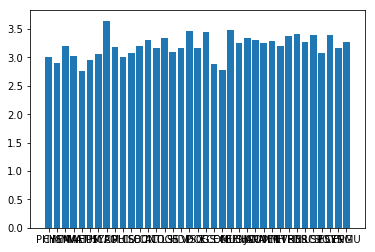

In [100]:
plt.bar(avgg_men.index.values,avgg_men.values)

<BarContainer object of 37 artists>

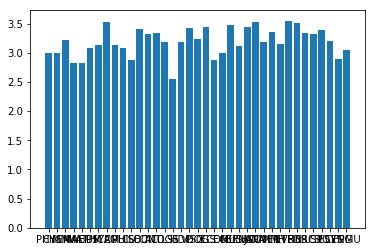

In [101]:
plt.bar(avgg_women.index.values,avgg_women.values)

NormaltestResult(statistic=0.4276072431656615, pvalue=0.8075069463891418)

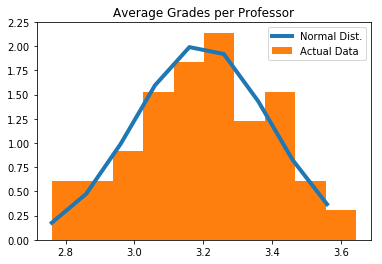

In [662]:
plotNormal(avgg_men)
normaltest(avgg_men)

NormaltestResult(statistic=1.7872426543058793, pvalue=0.4091713233488802)

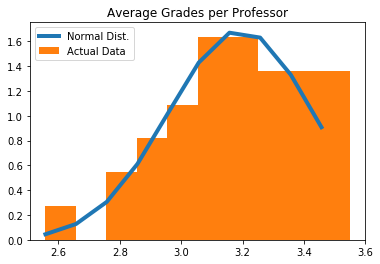

In [663]:
plotNormal(avgg_women)
normaltest(avgg_women)

array([2.9978866 , 2.99400474, 3.22613061, 2.82322449, 2.81912707,
       3.08890525, 3.12977698, 3.53229634, 3.14055281, 3.07443114,
       2.87915483, 3.40443186, 3.32258105, 3.34409814, 3.18495699,
       2.55745098, 3.18773527, 3.42224007, 3.24223728, 3.43870294,
       2.8700471 , 2.99707119, 3.47931006, 3.10823532, 3.44910826,
       3.52594306, 3.18090784, 3.34862858, 3.14638871, 3.54976255,
       3.50629161, 3.34444444, 3.33059069, 3.39862956, 3.20569799,
       2.88823529, 3.04470263])

In [661]:
t_val, p_val = ttest_ind(avgg_men.values, avgg_women.values)
p_val

0.9723956468537198

In [652]:
chisq, p_val_chi = stats.chisquare(np.array([avgg_men.values, avgg_women.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

In [653]:
p_val_chi

1.0

In [638]:
avg_overall_men = {}
avg_overall_women = {}

for d in depts:
    menv = df2[(df2['tDept'] == d) & (df2['gender'] == 1)]['rOverall'].mean()
    womenv = df2[(df2['tDept'] == d) & (df2['gender'] == -1)]['rOverall'].mean()
    
    if(pd.notnull(menv) and pd.notnull(womenv)):
        avg_overall_men[d] = df2[(df2['tDept'] == d) & (df2['gender'] == 1)]['rOverall'].mean()
        avg_overall_women[d] = df2[(df2['tDept'] == d) & (df2['gender'] == -1)]['rOverall'].mean()

In [643]:
avg_overall_men = pd.Series(avg_overall_men).dropna()
avg_overall_women = pd.Series(avg_overall_women).dropna()

NormaltestResult(statistic=4.719128336711455, pvalue=0.09446138348625745)

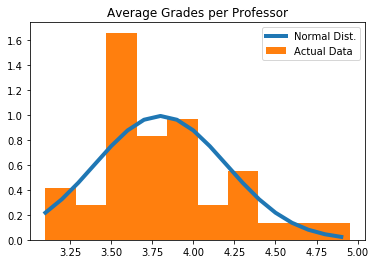

In [644]:
plotNormal(avg_overall_men)
normaltest(avg_overall_men)

NormaltestResult(statistic=1.035199312094228, pvalue=0.5959493158535504)

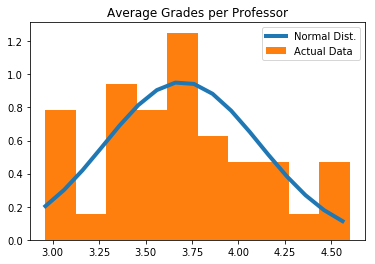

In [645]:
plotNormal(avg_overall_women)
normaltest(avg_overall_women)

In [646]:
t_val, p_val = ttest_ind(avg_overall_women,avg_overall_men)
p_val

In [14]:
len(avg_overall_women)

NameError: name 'avg_overall_women' is not defined

In [105]:
def perDept(column,n):
    eval_dict = {}
    depts = df2['tDept'].unique()
    for d in depts:
        eval_dict[d] = df2[df2["tDept"] == d][column].values.sum()

    #grab the top ten evaluations
    sorted_by_value = sorted(eval_dict.items(), key=lambda kv: kv[1], reverse=True)[:n]
    courses = [course[0] for course in sorted_by_value]
    values = [course[1] for course in sorted_by_value]
    
    return pd.Series(values,index=courses, name=column)  

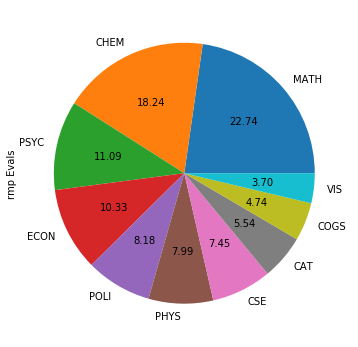

In [79]:
perDept('rmp Evals',10).plot.pie(figsize=(6, 6),autopct='%.2f')

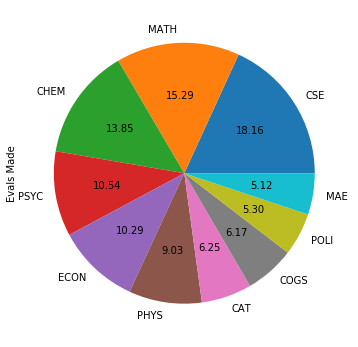

In [80]:
perDept('Evals Made',10).plot.pie(figsize=(6, 6),autopct='%.2f')

In [88]:
df2[df2['tDept'] == "CSE"]['Enroll'].sum()

222234

In [89]:
df2[df2['tDept'] == "MATH"]['Enroll'].sum()

207417

In [52]:
rmp_enroll = (df2['rmp Evals/Enroll'] * df2['Enroll']).astype(int)
df2['rmp Evals'] = rmp_enroll

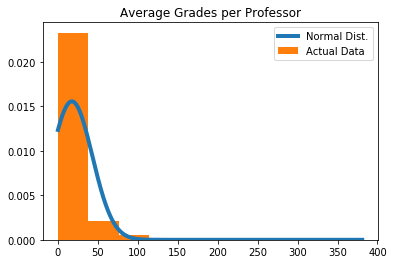

In [53]:
plotNormal(df2['rmp Evals'])

In [71]:
df2[df2['rmp Evals'] == 381]

,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,...,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll,rmp Enroll,rmp Evals
1,7855,1.0,CHEM,19349,9774,0.505142,0.861172,0.885933,7.689782,3.014609,...,3.91601,3.238095,4.018373,0.730769,3.142857,0.140177,"Amazing lectures,Caring,Tough grader,Respected...",0.019691,381,381


In [70]:
df2['rmp Evals'].value_counts()

1      180
2      109
4       95
3       88
5       77
7       53
6       51
8       49
13      45
10      45
14      44
9       44
11      40
12      34
15      33
16      29
19      26
17      24
23      23
18      22
0       22
21      21
25      20
31      18
29      18
22      17
26      15
33      14
34      14
28      12
      ... 
114      1
206      1
152      1
199      1
121      1
146      1
170      1
140      1
161      1
154      1
62       1
81       1
94       1
93       1
63       1
272      1
64       1
66       1
42       1
69       1
71       1
72       1
75       1
78       1
79       1
83       1
86       1
88       1
90       1
381      1
Name: rmp Evals, Length: 110, dtype: int64

In [ ]:
sns.lmplot(x='not_distracted', y='no_previous', data=crashes, fit_reg=False);

In [106]:
df = df2
df.head()

,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,...,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll,rmp Enroll,rmp Evals
0,7853,1.0,PHYS,3803,1478,0.388641,0.717524,0.531486,6.288403,3.100710,...,2.461538,3.116279,2.474359,0.333333,3.480000,0.068542,"Get ready to read,Test heavy,Tough grader,",0.020510,78,78
1,7855,1.0,CHEM,19349,9774,0.505142,0.861172,0.885933,7.689782,3.014609,...,3.916010,3.238095,4.018373,0.730769,3.142857,0.140177,"Amazing lectures,Caring,Tough grader,Respected...",0.019691,381,381
2,7857,1.0,MMW,2529,1579,0.624357,0.846111,0.947168,6.370589,3.312166,...,4.534884,3.508772,4.575581,NaN,3.000000,0.287243,NaN,0.034006,86,86
3,7858,1.0,MAE,3328,1333,0.400541,0.845998,0.716439,6.840503,3.414405,...,3.169492,3.228571,2.711864,0.000000,4.000000,0.031384,"Clear grading criteria,Graded by few things,Lo...",0.017728,59,59
4,7859,1.0,MATH,1958,851,0.434627,0.791921,0.683295,6.483631,3.285734,...,2.536585,3.166667,2.390244,0.000000,NaN,0.064891,"Lecture heavy,Lots of homework,""Skip class? Yo...",0.020940,41,41


In [109]:
perDept('gender',10)

PHYS     NaN
CHEM     NaN
MMW      NaN
MAE      NaN
MATH     NaN
HUM      NaN
PSYC     NaN
ICAM     NaN
POLI     NaN
PHIL    10.0
Name: gender, dtype: float64

## Studying Genders

In [129]:
avg_overall_men = {}
avg_overall_women = {}

for d in depts:
    avg_overall_men[d] = len(df2[(df2['tDept'] == d) & (df2['gender'] == 1)])
    avg_overall_women[d] = len(df2[(df2['tDept'] == d) & (df2['gender'] == -1)])

In [315]:
women_profs = pd.Series(avg_overall_women)
men_profs = pd.Series(avg_overall_men)

In [340]:
wm_ratio = men_profs / women_profs
wm_ratio = wm_ratio.dropna()
wm_ratio = wm_ratio.drop(wm_ratio[wm_ratio == np.inf].index)

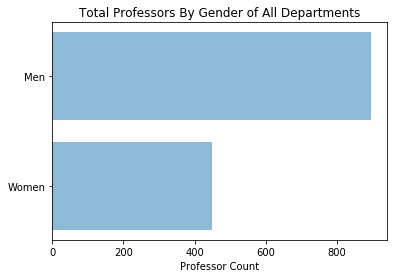

In [166]:
objects = ('Women','Men')
y_pos = np.arange(len(objects))
profs = [women_profs.sum(),men_profs.sum()]

plt.barh(y_pos, profs, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Professor Count')
plt.title('Total Professors By Gender of All Departments')
 
plt.show()

#### Now let's see ratio of men to female for each department

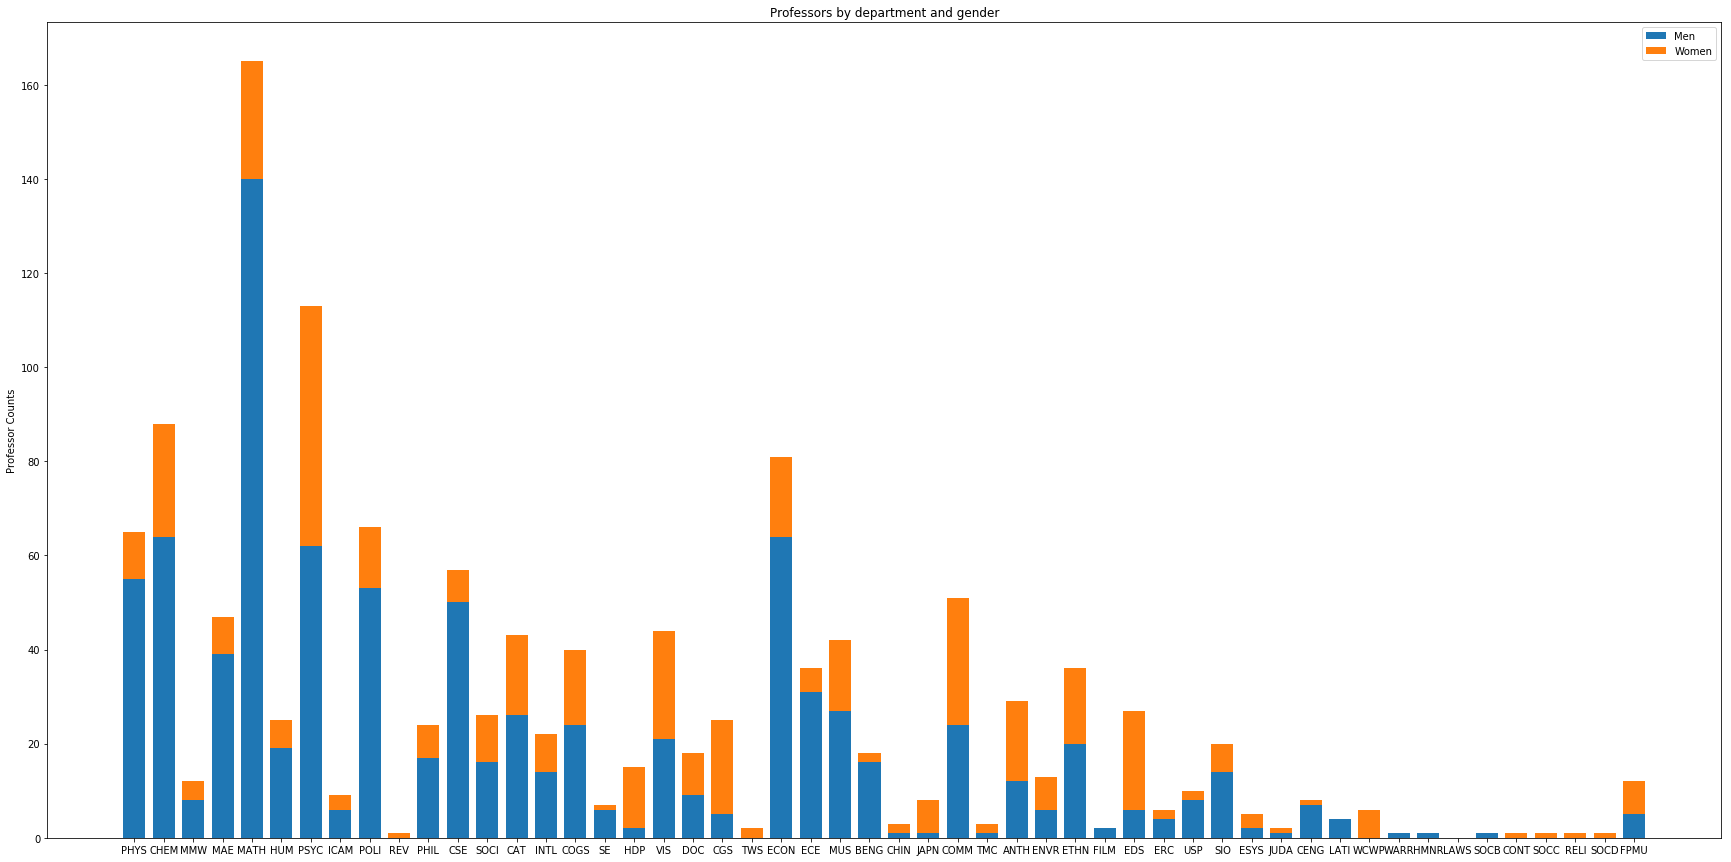

In [374]:
N = len(men_profs)
menMeans = men_profs
womenMeans = women_profs
ind = np.arange(N)    
width = 0.75

plt.figure(figsize=(30,15))
p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.ylabel('Professor Counts')
plt.title('Professors by department and gender')
plt.xticks(ind, men_profs.index.values)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))


plt.show() 

** Note that this is not representative of total professor for deparment because genders with nan values were removed

In [390]:
wm_ratio = wm_ratio.sort_values(ascending=False)

Text(0.5, 1.0, 'Ratio of Men to Women for Each Department')

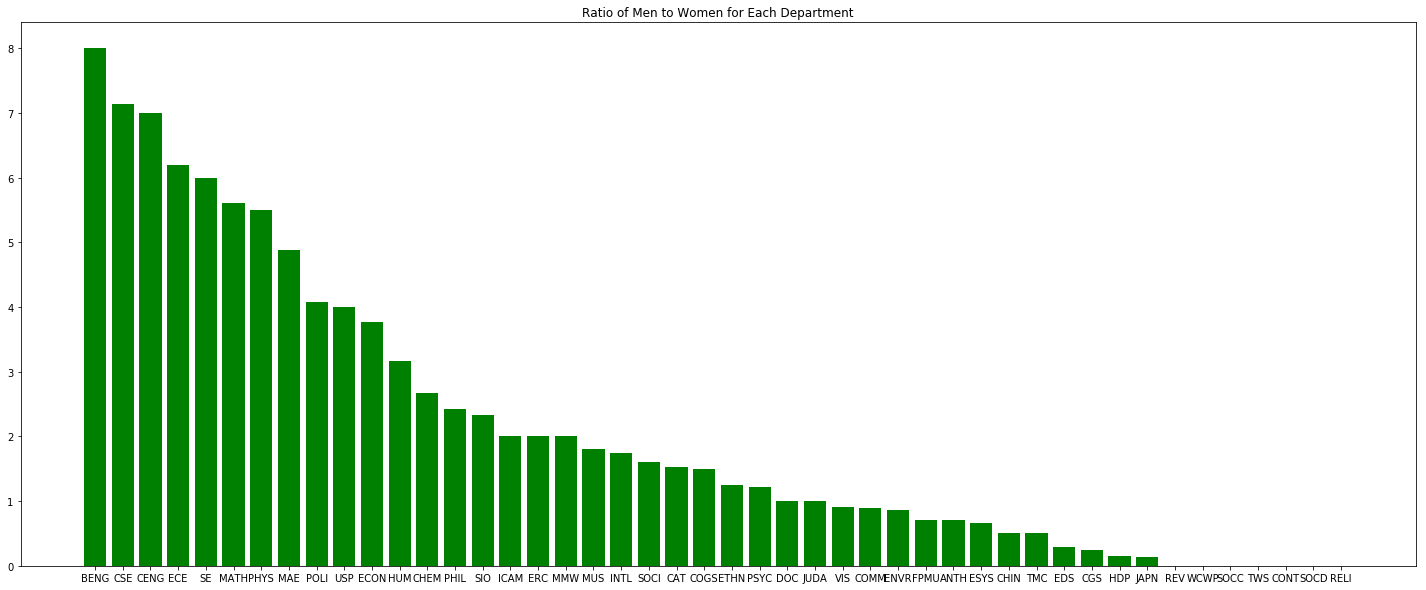

In [507]:
plt.figure(figsize=(25,10))
barlist = plt.bar(wm_ratio.index.values,(wm_ratio.values),color='g')
plt.title('Ratio of Men to Women for Each Department')

Here we notice a strong bias towards men in STEM departments

### Now let's look at average grades recieved for each department by gender

In [546]:
def genderColumn(col,nonans):
    avgg_men = {}
    avgg_women = {}
    depts_unused = {"M":[],"W":[]}
    for d in depts:
        menv = df2[(df2['tDept'] == d) & (df2['gender'] == 1)][col].mean()
        womenv = df2[(df2['tDept'] == d) & (df2['gender'] == -1)][col].mean()
        if(nonans):
            if(pd.notnull(menv) and pd.notnull(womenv)):
                avgg_men[d] = df2[(df2['tDept'] == d) & (df2['gender'] == 1)]['Avg Grade Received'].mean()
                avgg_women[d] = df2[(df2['tDept'] == d) & (df2['gender'] == -1)]['Avg Grade Received'].mean()  
            else:
                if(pd.notnull(menv)):
                    depts_unused["W"].append(d)
                elif(pd.notnull(womenv)):
                    depts_unused["M"].append(d)
                    
        else:
            avgg_men[d] = menv
            avgg_women[d] = womenv
    

        
    ms = pd.Series(avgg_men).dropna().sort_values(ascending=False)
    ws = pd.Series(avgg_women).dropna().sort_values(ascending=False)
    return ms, ws, depts_unused

In [533]:
avgg_men, avgg_women, depts_unused = genderColumn('Avg Grade Received',False)
avgg_rmp_men, avgg_rmp_women, depts_unused = genderColumn('rmp Grade',False)

In [514]:
wmg = pd.DataFrame([['M',avgg_rmp_men.values.mean(),avgg_men.values.mean()],['F',avgg_rmp_women.values.mean(),avgg_women.values.mean()]],
             columns=['Gender','RMP grades','CAPE grades'])
wmg

,Gender,RMP grades,CAPE grades
0,M,3.668544,3.201820
1,F,3.549026,3.205974


It's interesting to notice that the average grades given on CAPES between genders very close, to the 0.001 degree, however, grades reported on RMP across genders differs by approximately 0.12 points, favoring male professors.

### Let's Check if The Distributions are Normal

In [515]:
def plotNormal(data,title):
    xs = np.arange(data.min(), data.max(), 0.1)
    fit = stats.norm.pdf(xs, np.mean(data), np.std(data))

    plt.plot(xs, fit, label='Normal Dist.', lw=4)
    plt.hist(data, density=True, label='Actual Data');
    plt.title(title)
    plt.legend();

In [516]:
def computeGenderGradePlots():
    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    plotNormal(avgg_men,"Men Cape Grades")
    s,p =normaltest(avgg_men)
    plt.xlabel('p-value: ' + str(p))

    plt.subplots_adjust(wspace = 0.5)
    plt.subplots_adjust(hspace = 0.5)

    plt.subplot(2, 2, 2)
    plotNormal(avgg_rmp_men,"Men RMP Grades")
    s,p =normaltest(avgg_rmp_men)
    plt.xlabel('p-value: ' + str(p))

    plt.subplot(2, 2, 3)
    plotNormal(avgg_women,"Women Cape Grades")
    s,p =normaltest(avgg_women)
    plt.xlabel('p-value: ' + str(p))


    plt.subplot(2, 2, 4)
    plotNormal(avgg_rmp_women,"Women RMP Grades")
    s,p =normaltest(avgg_rmp_women)
    plt.xlabel('p-value: ' + str(p))

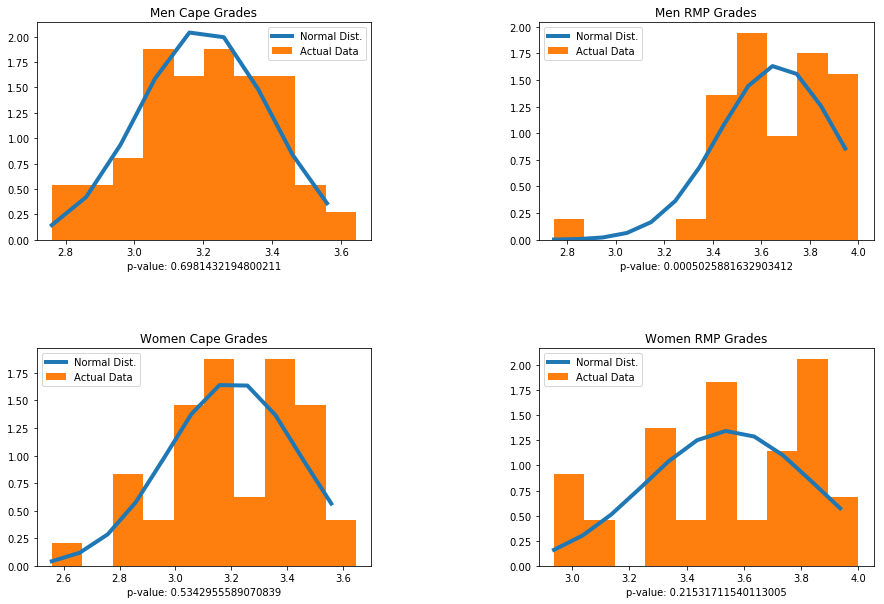

In [517]:
computeGenderGradePlots()

From the above distributions, we can see that the Men RMP Grades are not normally distributed but skewed left. This agrees with the above observation of men having a slightly higher reported GPA on RMP than Women

The above data contained departments that contained either no male nor female professors. Let's only look at departments that have both professors to see if there is any different in avergage GPA across genders

In [548]:
avgg_men, avgg_women, depts_unused = genderColumn('Avg Grade Received',True)
avgg_rmp_men, avgg_rmp_women, depts_unused_rmp = genderColumn('rmp Grade',True)

Below are the departments that contain no female or male professors. By looking at the chart above showing the ratio's of male to female professors, we can see that some of the departments appearing on the left and right poles also appear in the bottom list, which make sense.

In [549]:
print("Departments w/o any men in Capes")
print(depts_unused["M"])
print("Departments w/o any women in Capes")
print(depts_unused["W"])
print()
print("Departments w/o any men in RMP")
print(depts_unused_rmp["M"])
print("Departments w/o any women in RMP")
print(depts_unused_rmp["W"])

Departments w/o any men in Capes
['TWS', 'TMC', 'JUDA', 'WCWP', 'SOCC', 'RELI', 'SOCD']
Departments w/o any women in Capes
['FILM', 'LATI', 'WARR', 'HMNR', 'SOCB']

Departments w/o any men in RMP
['REV', 'TWS', 'JAPN', 'WCWP', 'CONT', 'RELI']
Departments w/o any women in RMP
['SE', 'FILM', 'CENG', 'LATI', 'WARR', 'HMNR']


In [519]:
wmg = pd.DataFrame([['M',avgg_rmp_men.values.mean(),avgg_men.values.mean()],['F',avgg_rmp_women.values.mean(),avgg_women.values.mean()]],
             columns=['Gender','RMP grades','CAPE grades'])
wmg

,Gender,RMP grades,CAPE grades
0,M,3.196830,3.195941
1,F,3.205976,3.194160


From the above table we can see that when considering only departments with both genders, not only do the male and female RMP grades agree with each other, but all the GPA's fall within very close range of each other

Let's run normal distributions on this data once more

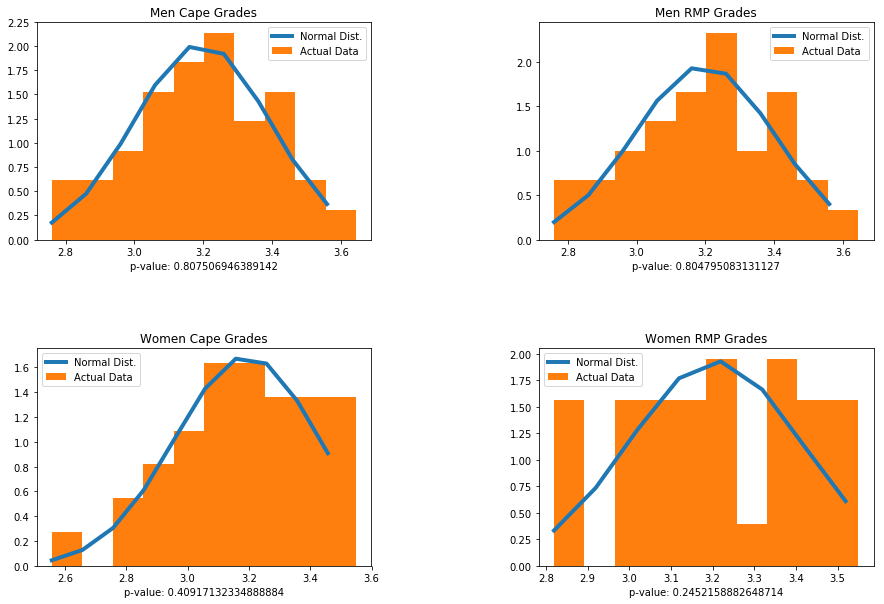

In [521]:
computeGenderGradePlots()

Let's check if there is a statistical difference in cape grades per gender

In [558]:
t_val, p_val = ttest_ind(avgg_men,avgg_women)
p_val

0.9723956468537129

In [557]:
t_val, p_val = ttest_ind(avgg_rmp_men,avgg_rmp_women)
p_val

0.8557413294964524

In [468]:
t_val, p_val = ttest_ind(avgg_rmp_men,avgg_rmp_women)
p_val

0.8557413294964524

In [249]:
df.corr()

,tid,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll,rmp Enroll,rmp Evals
tid,1.000000,-0.128044,-0.233085,-0.210313,0.115497,0.046099,-0.001909,0.132634,-0.039373,0.072296,0.044922,0.117925,0.010856,0.103941,0.062024,0.057358,0.098476,-0.113295,-0.409572,-0.409572
gender,-0.128044,1.000000,0.076551,0.056402,-0.170901,-0.064318,-0.034920,0.163336,-0.182918,-0.205298,0.084646,-0.011822,-0.020919,-0.017517,0.030362,0.017334,0.013582,-0.047600,0.086522,0.086522
Enroll,-0.233085,0.076551,1.000000,0.962361,-0.123082,0.030946,0.075839,0.055707,-0.017448,-0.042050,-0.001720,0.036227,0.017315,0.046158,0.012029,-0.014710,0.051282,-0.097322,0.695739,0.695739
Evals Made,-0.210313,0.056402,0.962361,1.000000,-0.008690,0.042130,0.097572,0.072085,-0.026153,-0.035027,0.005367,0.056516,0.028833,0.066273,0.020620,-0.022318,0.062323,-0.098366,0.687411,0.687411
Eval/Enroll,0.115497,-0.170901,-0.123082,-0.008690,1.000000,0.090644,0.148152,-0.082717,0.013844,0.098760,-0.030084,0.105804,0.040461,0.113732,0.015672,-0.046596,0.055087,0.068208,-0.063882,-0.063882
Rcmnd Class,0.046099,-0.064318,0.030946,0.042130,0.090644,1.000000,0.704382,-0.175021,0.481200,0.219124,-0.277107,0.435628,0.357271,0.447875,0.303935,0.120871,0.334031,0.048307,-0.004391,-0.004391
Rcmnd Instr,-0.001909,-0.034920,0.075839,0.097572,0.148152,0.704382,1.000000,-0.166881,0.388413,0.264166,-0.274155,0.575560,0.338115,0.607847,0.374810,0.179245,0.434771,0.036704,0.016423,0.016423
Study Hrs/wk,0.132634,0.163336,0.055707,0.072085,-0.082717,-0.175021,-0.166881,1.000000,-0.481949,-0.331798,0.380900,-0.073987,-0.016655,-0.087637,-0.091688,-0.066102,-0.063407,-0.041253,-0.000090,-0.000090
Avg Grade Expected,-0.039373,-0.182918,-0.017448,-0.026153,0.013844,0.481200,0.388413,-0.481949,1.000000,0.758011,-0.465803,0.200311,0.217549,0.214171,0.131856,0.250663,0.183177,0.075379,-0.083957,-0.083957
Avg Grade Received,0.072296,-0.205298,-0.042050,-0.035027,0.098760,0.219124,0.264166,-0.331798,0.758011,1.000000,-0.381679,0.184626,0.226747,0.189124,0.067661,0.323149,0.180095,0.037208,-0.132743,-0.132743


In [ ]:
plt.figure(figsize=(20,10))
plt.bar(avgg_women.index.values,(avgg_women.values))

In [ ]:
objects = ('Women','Men')
y_pos = np.arange(len(objects))
profs = [women_profs.sum(),men_profs.sum()]

plt.barh(y_pos, profs, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Professor Count')
plt.title('Total Professors By Gender of All Departments')
 
plt.show()

NormaltestResult(statistic=34.93921345664577, pvalue=2.5884882437577213e-08)

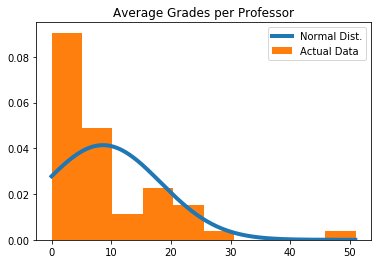

In [140]:
plotNormal(pd.Series(avg_overall_women))
normaltest(pd.Series(avg_overall_women))

52

NormaltestResult(statistic=51.66995470038228, pvalue=6.025760923369276e-12)

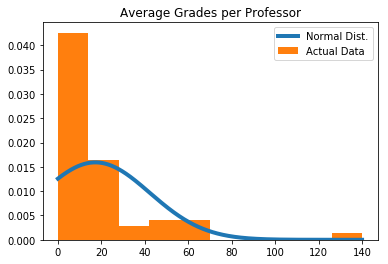

In [141]:
plotNormal(pd.Series(avg_overall_men))
normaltest(pd.Series(avg_overall_men))

In [232]:
ee = df[df['tid'] == 2011356]['Enroll']

In [229]:
ee2 =  df[df['tid'] == 2011356]['rmp Evals/Enroll']

In [240]:
(ee*ee2)

1201    1.0
dtype: float64

In [234]:
df[df['tid'] == 2011356]

,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,...,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll,rmp Enroll,rmp Evals
1201,2011356,-1.0,WCWP,4215,2104,0.49917,0.675743,0.832987,7.505114,3.194068,...,5.0,NaN,5.0,1.0,4.0,0.479167,"Gives good feedback,Get ready to read,So many ...",0.000237,0,0
